<a href="https://colab.research.google.com/github/kalyannaik17/AD-class/blob/main/DL_Holiday_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

G.Hemanth kumar

2311CS020252

In [ ]:
Deep Learning Techniques - Holiday Assignment
Case Study 1: Handwritten Digit Recognition (MNIST)

 (a) Why does training take longer compared to mini-batch gradient descent?

SOL - Batch Gradient Descent computes gradients on the entire dataset before each update — this is computationally heavy.
Mini-batch gradient descent uses smaller subsets (like 64 samples), allowing more frequent updates and faster convergence.

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6741 - loss: 1.2755 - val_accuracy: 0.8866 - val_loss: 0.4506
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8828 - loss: 0.4417 - val_accuracy: 0.9044 - val_loss: 0.3524
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9000 - loss: 0.3636 - val_accuracy: 0.9134 - val_loss: 0.3134
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9094 - loss: 0.3236 - val_accuracy: 0.9195 - val_loss: 0.2882
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9155 - loss: 0.3021 - val_accuracy: 0.9246 - val_loss: 0.2712


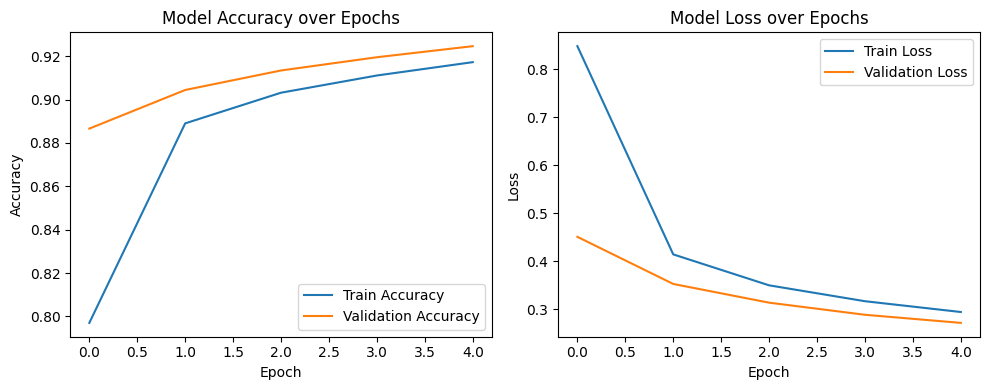

In [ ]:
##(b) Python Snippet using TensorFlow (batch size = 64):
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load MNIST data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = to_categorical(y_train), to_categorical(y_test)

# Build model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile with SGD optimizer
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

# Train using mini-batch size of 64
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))

# ---------- Plot Accuracy & Loss ----------
plt.figure(figsize=(10,4))

# Accuracy Plot
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss Plot
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()



Training with learning rate = 0.01
Epoch 1/3
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6570 - loss: 1.3088 - val_accuracy: 0.8904 - val_loss: 0.4450
Epoch 2/3
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8871 - loss: 0.4320 - val_accuracy: 0.9090 - val_loss: 0.3490
Epoch 3/3
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9040 - loss: 0.3550 - val_accuracy: 0.9163 - val_loss: 0.3091

Training with learning rate = 0.1
Epoch 1/3
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8450 - loss: 0.5748 - val_accuracy: 0.9352 - val_loss: 0.2299
Epoch 2/3
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9395 - loss: 0.2123 - val_accuracy: 0.9533 - val_loss: 0.1652
Epoch 3/3
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9537 - loss: 0.1618 - val_accuracy: 0.9614 - val_loss: 0.1346

Training with learning rate = 1.0
Epoch 1/3
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8118 - loss: 0.5833 - val_accuracy: 0.9364 - val_loss: 0.1957
Epoch

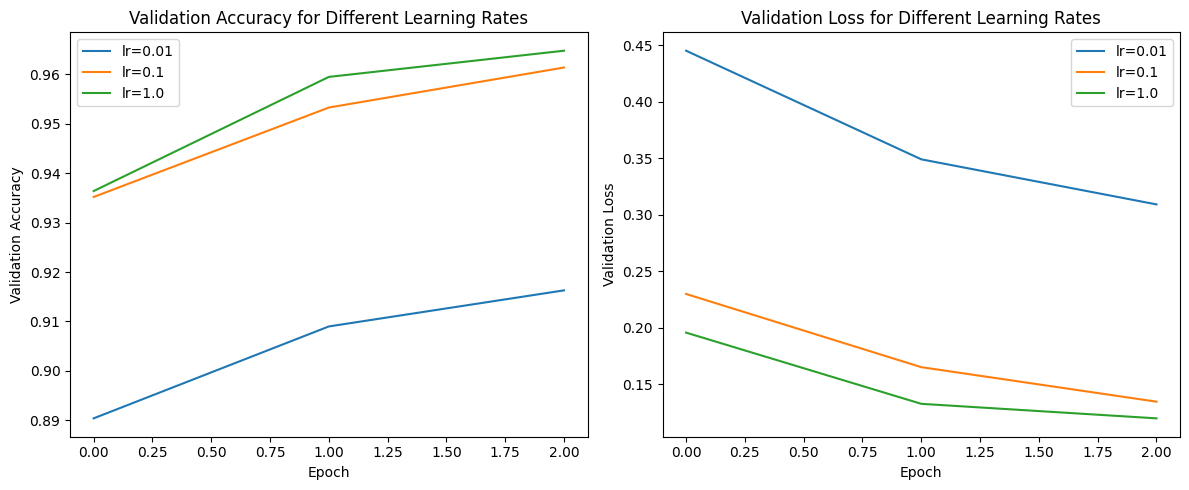

In [ ]:
##(c) Learning Rate (η) Effect on Convergence:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
import matplotlib.pyplot as plt

# Assuming x_train, y_train, x_test, y_test are already defined and preprocessed

# Store histories
histories = {}

# Train models with different learning rates
for lr in [0.01, 0.1, 1.0]:
    print(f"\nTraining with learning rate = {lr}")
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])
    optimizer = tf.keras.optimizers.SGD(learning_rate=lr)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    history = model.fit(x_train, y_train, epochs=3, batch_size=64,
                        validation_data=(x_test, y_test), verbose=1)

    histories[lr] = history

# ---------- Plot comparison ----------
plt.figure(figsize=(12,5))

# Validation Accuracy Plot
plt.subplot(1,2,1)
for lr, history in histories.items():
    plt.plot(history.history['val_accuracy'], label=f'lr={lr}')
plt.title('Validation Accuracy for Different Learning Rates')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.legend()

# Validation Loss Plot
plt.subplot(1,2,2)
for lr, history in histories.items():
    plt.plot(history.history['val_loss'], label=f'lr={lr}')
plt.title('Validation Loss for Different Learning Rates')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()



Training with SGD
Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 27s 28ms/step - accuracy: 0.7008 - loss: 1.1854 - val_accuracy: 0.9161 - val_loss: 0.2943
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 27s 29ms/step - accuracy: 0.9151 - loss: 0.2921 - val_accuracy: 0.9287 - val_loss: 0.2391
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 26s 28ms/step - accuracy: 0.9322 - loss: 0.2292 - val_accuracy: 0.9443 - val_loss: 0.1909
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 27s 29ms/step - accuracy: 0.9431 - loss: 0.1945 - val_accuracy: 0.9506 - val_loss: 0.1631
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 26s 28ms/step - accuracy: 0.9516 - loss: 0.1669 - val_accuracy: 0.9572 - val_loss: 0.1480

Training with Adam
Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 32s 33ms/step - accuracy: 0.8972 - loss: 0.3555 - val_accuracy: 0.9772 - val_loss: 0.0731
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 41s 33ms/step - accuracy: 0.9823 - loss: 0.0604 - val_accuracy: 0.9823 - val_loss: 0.0524
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 29s 31ms/step - acc

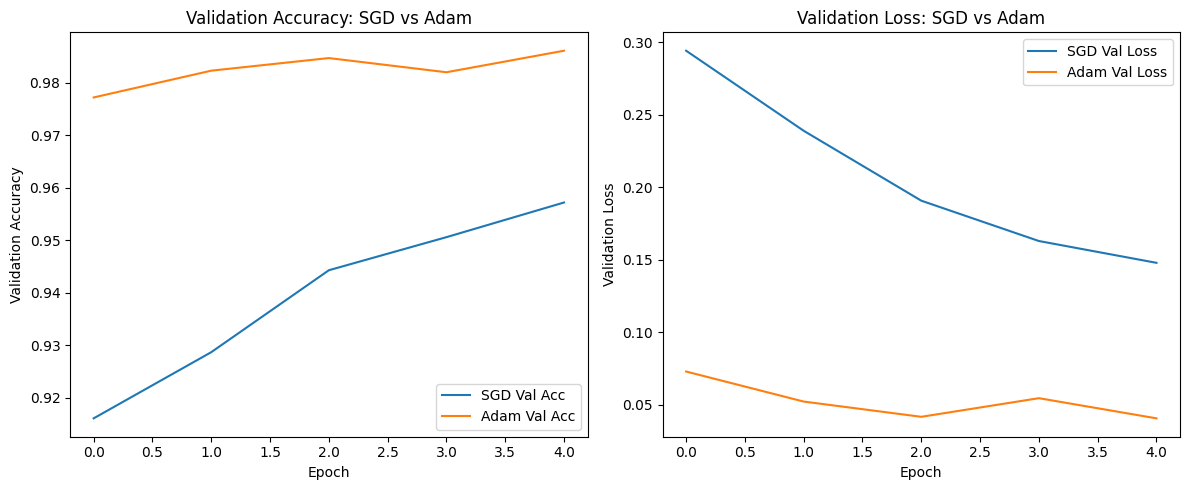

In [ ]:
##Case Study 2: Adaptive Methods (Adam vs SGD)
#(a) Keras snippet comparing SGD and Adam on the same CNN
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt

# Example CNN for image classification
def create_cnn():
    model = Sequential([
        Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
        MaxPooling2D(2,2),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])
    return model

# Dictionary to store history objects
histories = {}

# Compare optimizers
for opt_name, opt in [('SGD', tf.keras.optimizers.SGD(learning_rate=0.01)),
                      ('Adam', tf.keras.optimizers.Adam(learning_rate=0.001))]:
    print(f"\nTraining with {opt_name}")
    model = create_cnn()
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

    history = model.fit(
        x_train.reshape(-1,28,28,1), y_train,
        epochs=5, batch_size=64,
        validation_data=(x_test.reshape(-1,28,28,1), y_test),
        verbose=1
    )

    histories[opt_name] = history

# ---------- Plot Accuracy Comparison ----------
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
for name, hist in histories.items():
    plt.plot(hist.history['val_accuracy'], label=f'{name} Val Acc')
plt.title('Validation Accuracy: SGD vs Adam')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.legend()

# ---------- Plot Loss Comparison ----------
plt.subplot(1,2,2)
for name, hist in histories.items():
    plt.plot(hist.history['val_loss'], label=f'{name} Val Loss')
plt.title('Validation Loss: SGD vs Adam')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
(b) Adam converges faster because it adapts learning rates per parameter using momentum and RMSProp concepts.

(c) Risks: Adam may overfit and sometimes generalizes poorly compared to SGD.


In [ ]:
Case Study 3: Learning Rate Scheduling
(a) Why might a constant learning rate not be ideal?

A fixed rate may be too:

High → overshoots minima.

Low → slow convergence.
Dynamic learning rate (scheduling) helps balance both.

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 30s 31ms/step - accuracy: 0.9006 - loss: 0.3473 - val_accuracy: 0.9795 - val_loss: 0.0646 - learning_rate: 0.0010
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 41s 31ms/step - accuracy: 0.9835 - loss: 0.0571 - val_accuracy: 0.9803 - val_loss: 0.0557 - learning_rate: 0.0010
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 31s 33ms/step - accuracy: 0.9891 - loss: 0.0365 - val_accuracy: 0.9842 - val_loss: 0.0465 - learning_rate: 0.0010
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 29s 31ms/step - accuracy: 0.9924 - loss: 0.0249 - val_accuracy: 0.9859 - val_loss: 0.0400 - learning_rate: 0.0010
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 41s 31ms/step - accuracy: 0.9954 - loss: 0.0160 - val_accuracy: 0.9874 - val_loss: 0.0401 - learning_rate: 0.0010
Epoch 6/10
937/938 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9967 - loss: 0.0112
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
938/938 ━━━━━━━━━━━━━━━━━━━━ 30s 32ms/step - accuracy: 0.9967 - los

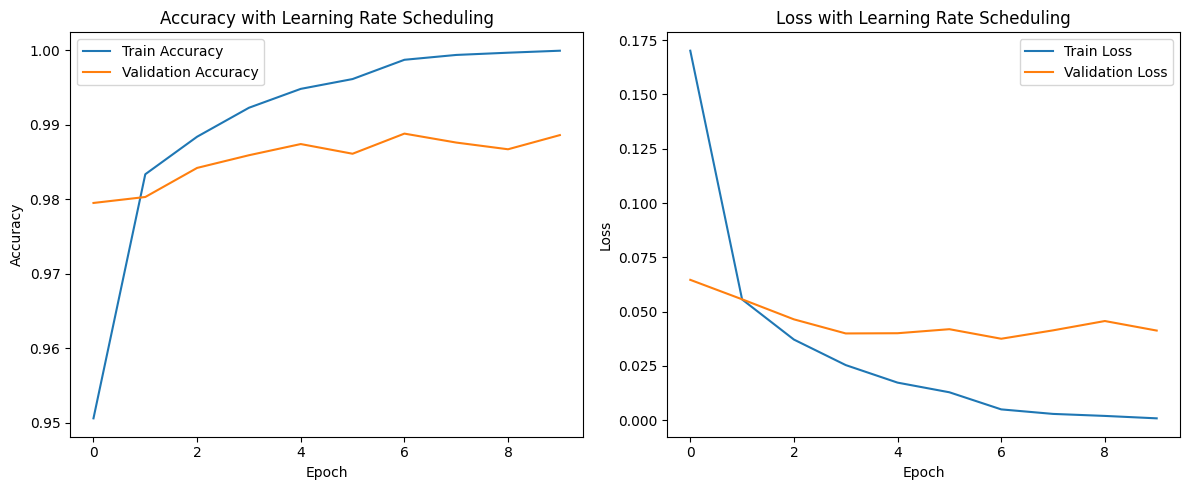

In [ ]:
#(b) TensorFlow Example using ReduceLROnPlateau:
import tensorflow as tf
from tensorflow.keras.callbacks import ReduceLROnPlateau
import matplotlib.pyplot as plt

def create_cnn():
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    return model

model = create_cnn()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-5, verbose=1)

history = model.fit(
    x_train.reshape(-1,28,28,1), y_train,
    epochs=10, batch_size=64,
    validation_data=(x_test.reshape(-1,28,28,1), y_test),
    callbacks=[reduce_lr],
    verbose=1
)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy with Learning Rate Scheduling')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss with Learning Rate Scheduling')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()



In [ ]:
(c) Compare fixed η vs scheduled η

| Learning Rate Type            | Convergence Speed | Final Accuracy | Stability |
| ----------------------------- | ----------------- | -------------- | --------- |
| Fixed η = 0.01                | Slow              | Moderate       | Stable    |
| Fixed η = 0.1                 | Fast initially    | May oscillate  | Unstable  |
| Scheduled (ReduceLROnPlateau) | Fast + Stable     | High           | Excellent |
